In [2]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('NSE_data_all_stocks_2019.csv')

In [4]:
data.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-19,EGAD,Eaagads Ltd,8.2,14,14.5,14.5,14.5,14.5,NaN,NaN,NaN,NaN
1,2-Jan-19,KUKZ,Kakuzi Plc,300,423.5,310,310,310,310,NaN,NaN,NaN,NaN
2,2-Jan-19,KAPC,Kapchorua Tea Kenya Plc,59,95,74.5,74.5,74.5,75,-0.5,0.67%,200,NaN
3,2-Jan-19,LIMT,Limuru Tea Plc,385,475,500,500,500,500,NaN,NaN,NaN,NaN
4,2-Jan-19,SASN,Sasini Plc,14.8,19,19,21,19.8,19.9,-0.1,0.50%,"1,000",NaN


In [5]:
data.tail()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
18142,31-Dec-19,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","2,654.39","2,654.39","2,654.39","2,633.01",21.38,0.81%,NaN,NaN
18143,31-Dec-19,^N25I,NSE 25-Share Index,"2,943.60","4,207.90","4,100.57","4,100.57","4,100.57","4,069.05",31.52,0.77%,NaN,NaN
18144,31-Dec-19,^NASI,NSE All-Share Index,124.3,171.36,166.41,166.41,166.41,165.37,1.04,0.63%,NaN,NaN
18145,31-Dec-19,^ZKEQTK,Zamara Kenya Equity Index (KES),"1,513.07","2,242.89","2,187.60","2,187.60","2,187.60","2,165.49",22.11,1.02%,NaN,NaN
18146,31-Dec-19,^ZKEQTU,Zamara Kenya Equity Index (USD),"1,225.28","1,905.40","1,858.43","1,858.43","1,858.43","1,838.74",19.69,1.07%,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       18147 non-null  object 
 1   CODE       18147 non-null  object 
 2   NAME       18147 non-null  object 
 3   12m Low    18147 non-null  object 
 4   12m High   18147 non-null  object 
 5   Day Low    18146 non-null  object 
 6   Day High   18146 non-null  object 
 7   Day Price  18146 non-null  object 
 8   Previous   18147 non-null  object 
 9   Change     11302 non-null  float64
 10  Change%    11293 non-null  object 
 11  Volume     11687 non-null  object 
 12  Adjust     204 non-null    float64
dtypes: float64(2), object(11)
memory usage: 1.8+ MB


In [7]:
data.isnull()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,False,False,False,False,False,False,False,False,False,False,False,True,True
18143,False,False,False,False,False,False,False,False,False,False,False,True,True
18144,False,False,False,False,False,False,False,False,False,False,False,True,True
18145,False,False,False,False,False,False,False,False,False,False,False,True,True


In [8]:
data.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          1
Day High         1
Day Price        1
Previous         0
Change        6845
Change%       6854
Volume        6460
Adjust       17943
dtype: int64

In [9]:
#fill missing values with 0
df = data.fillna(0)
df

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-19,EGAD,Eaagads Ltd,8.2,14,14.5,14.5,14.5,14.5,0.00,0,0,0.0
1,2-Jan-19,KUKZ,Kakuzi Plc,300,423.5,310,310,310,310,0.00,0,0,0.0
2,2-Jan-19,KAPC,Kapchorua Tea Kenya Plc,59,95,74.5,74.5,74.5,75,-0.50,0.67%,200,0.0
3,2-Jan-19,LIMT,Limuru Tea Plc,385,475,500,500,500,500,0.00,0,0,0.0
4,2-Jan-19,SASN,Sasini Plc,14.8,19,19,21,19.8,19.9,-0.10,0.50%,"1,000",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,31-Dec-19,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","2,654.39","2,654.39","2,654.39","2,633.01",21.38,0.81%,0,0.0
18143,31-Dec-19,^N25I,NSE 25-Share Index,"2,943.60","4,207.90","4,100.57","4,100.57","4,100.57","4,069.05",31.52,0.77%,0,0.0
18144,31-Dec-19,^NASI,NSE All-Share Index,124.3,171.36,166.41,166.41,166.41,165.37,1.04,0.63%,0,0.0
18145,31-Dec-19,^ZKEQTK,Zamara Kenya Equity Index (KES),"1,513.07","2,242.89","2,187.60","2,187.60","2,187.60","2,165.49",22.11,1.02%,0,0.0


In [10]:
df.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [11]:
df['NAME'].value_counts()

Eaagads Ltd                     250
Kakuzi Plc                      250
Olympia Capital Holdings Ltd    250
Kurwitu Ventures Ltd            250
Home Afrika Ltd                 250
                               ... 
Kenya Airways Plc               250
Express Kenya Plc               250
Eveready East Africa Ltd        250
Mumias Sugar Company Ltd        200
KenolKobil Ltd                  197
Name: NAME, Length: 73, dtype: int64

In [ ]:
df.dtypes

Text(0, 0.5, 'Adjust')

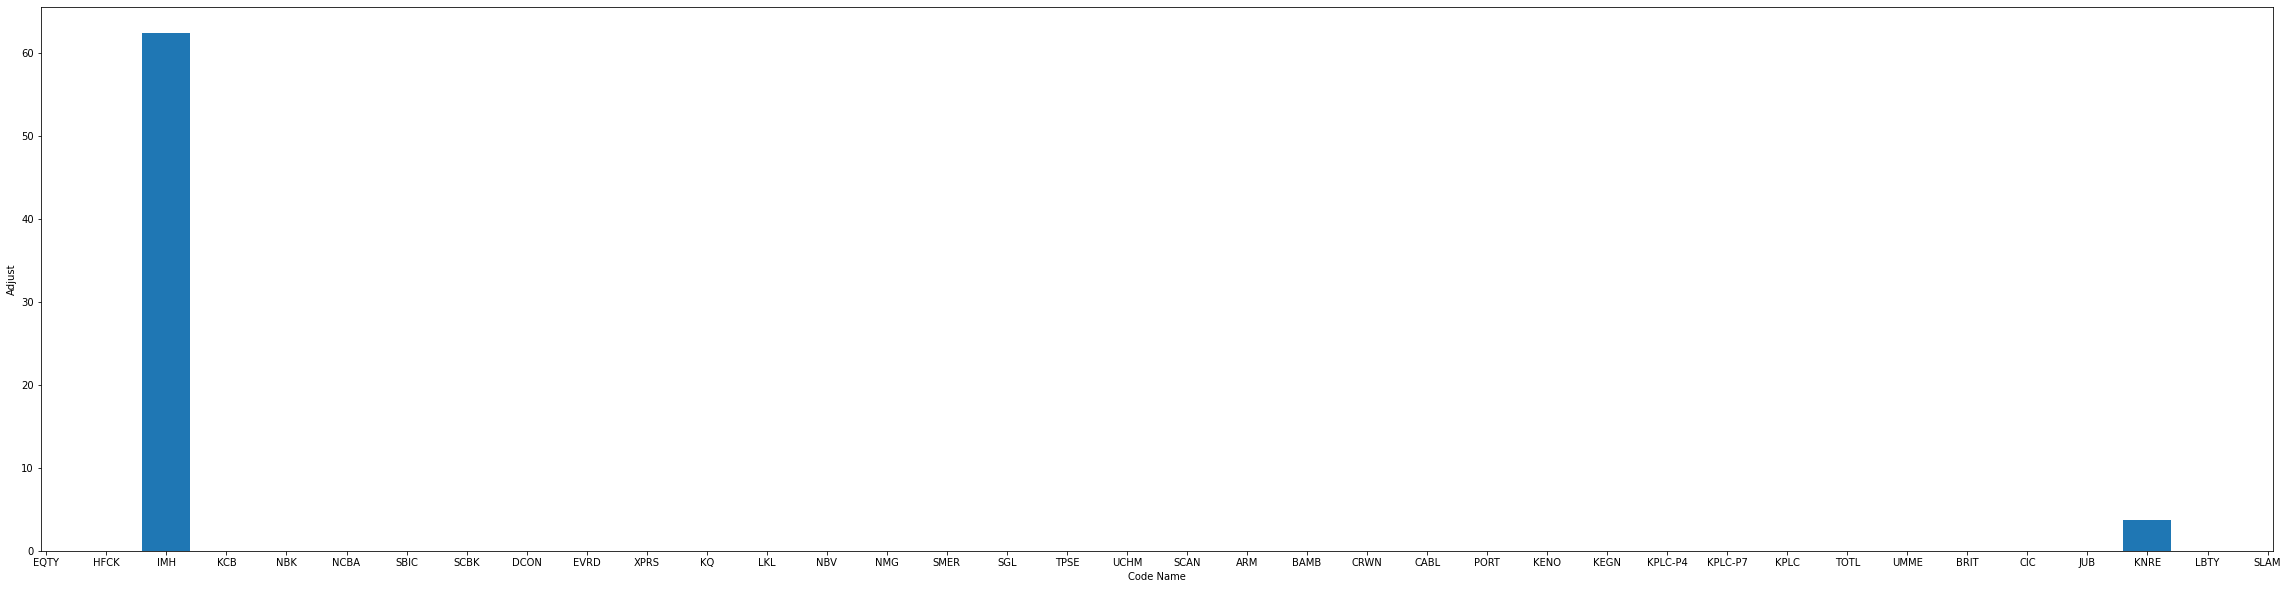

In [12]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Adjust'])
plt.xlabel('Code Name')
plt.ylabel('Adjust')

In [ ]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Change'])
plt.xlabel('Code Name')
plt.ylabel('Change')

Text(0, 0.5, 'Change')